In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [95]:
training_df = pd.read_csv("fullData.csv")

In [3]:
training_df.columns.to_list()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [4]:
training_df['SalePrice'].describe()

count      2919.000000
mean     180052.854648
std       57381.565721
min       34900.000000
25%      154795.084150
50%      176734.841500
75%      191895.744150
max      755000.000000
Name: SalePrice, dtype: float64

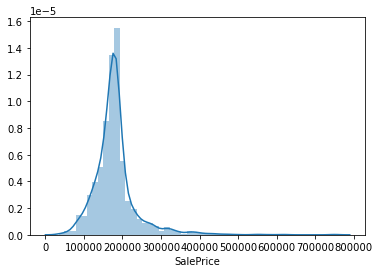

In [5]:
sns.distplot(training_df['SalePrice']);

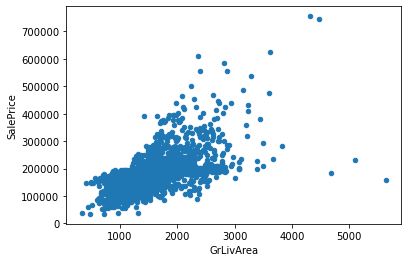

In [6]:
x_var = 'GrLivArea'
data = pd.concat([training_df['SalePrice'],training_df[x_var]], axis =1)
data.plot.scatter(x=x_var,y='SalePrice');

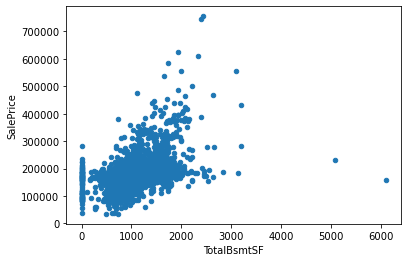

In [7]:
x_var = 'TotalBsmtSF'
data = pd.concat([training_df['SalePrice'],training_df[x_var]], axis =1)
data.plot.scatter(x=x_var,y='SalePrice');

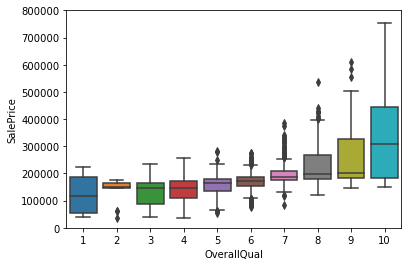

In [8]:
x_var = 'OverallQual'
data = pd.concat([training_df['SalePrice'],training_df[x_var]], axis =1)
f, ax = plt.subplots()
fig = sns.boxplot(x=x_var, y="SalePrice", data=data)
fig.axis(ymin=0,ymax=800000);

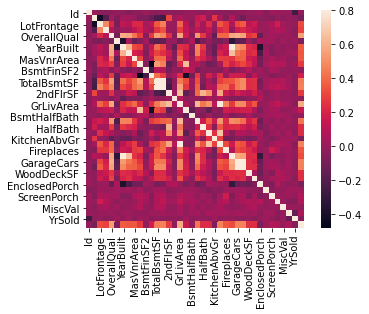

In [9]:
corrmat = training_df.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, vmax=0.8, square=True);

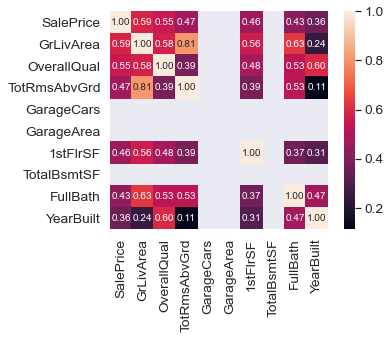

In [10]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(training_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,fmt='.2f', annot_kws = {'size':10}, yticklabels=cols.values, xticklabels=cols.values);

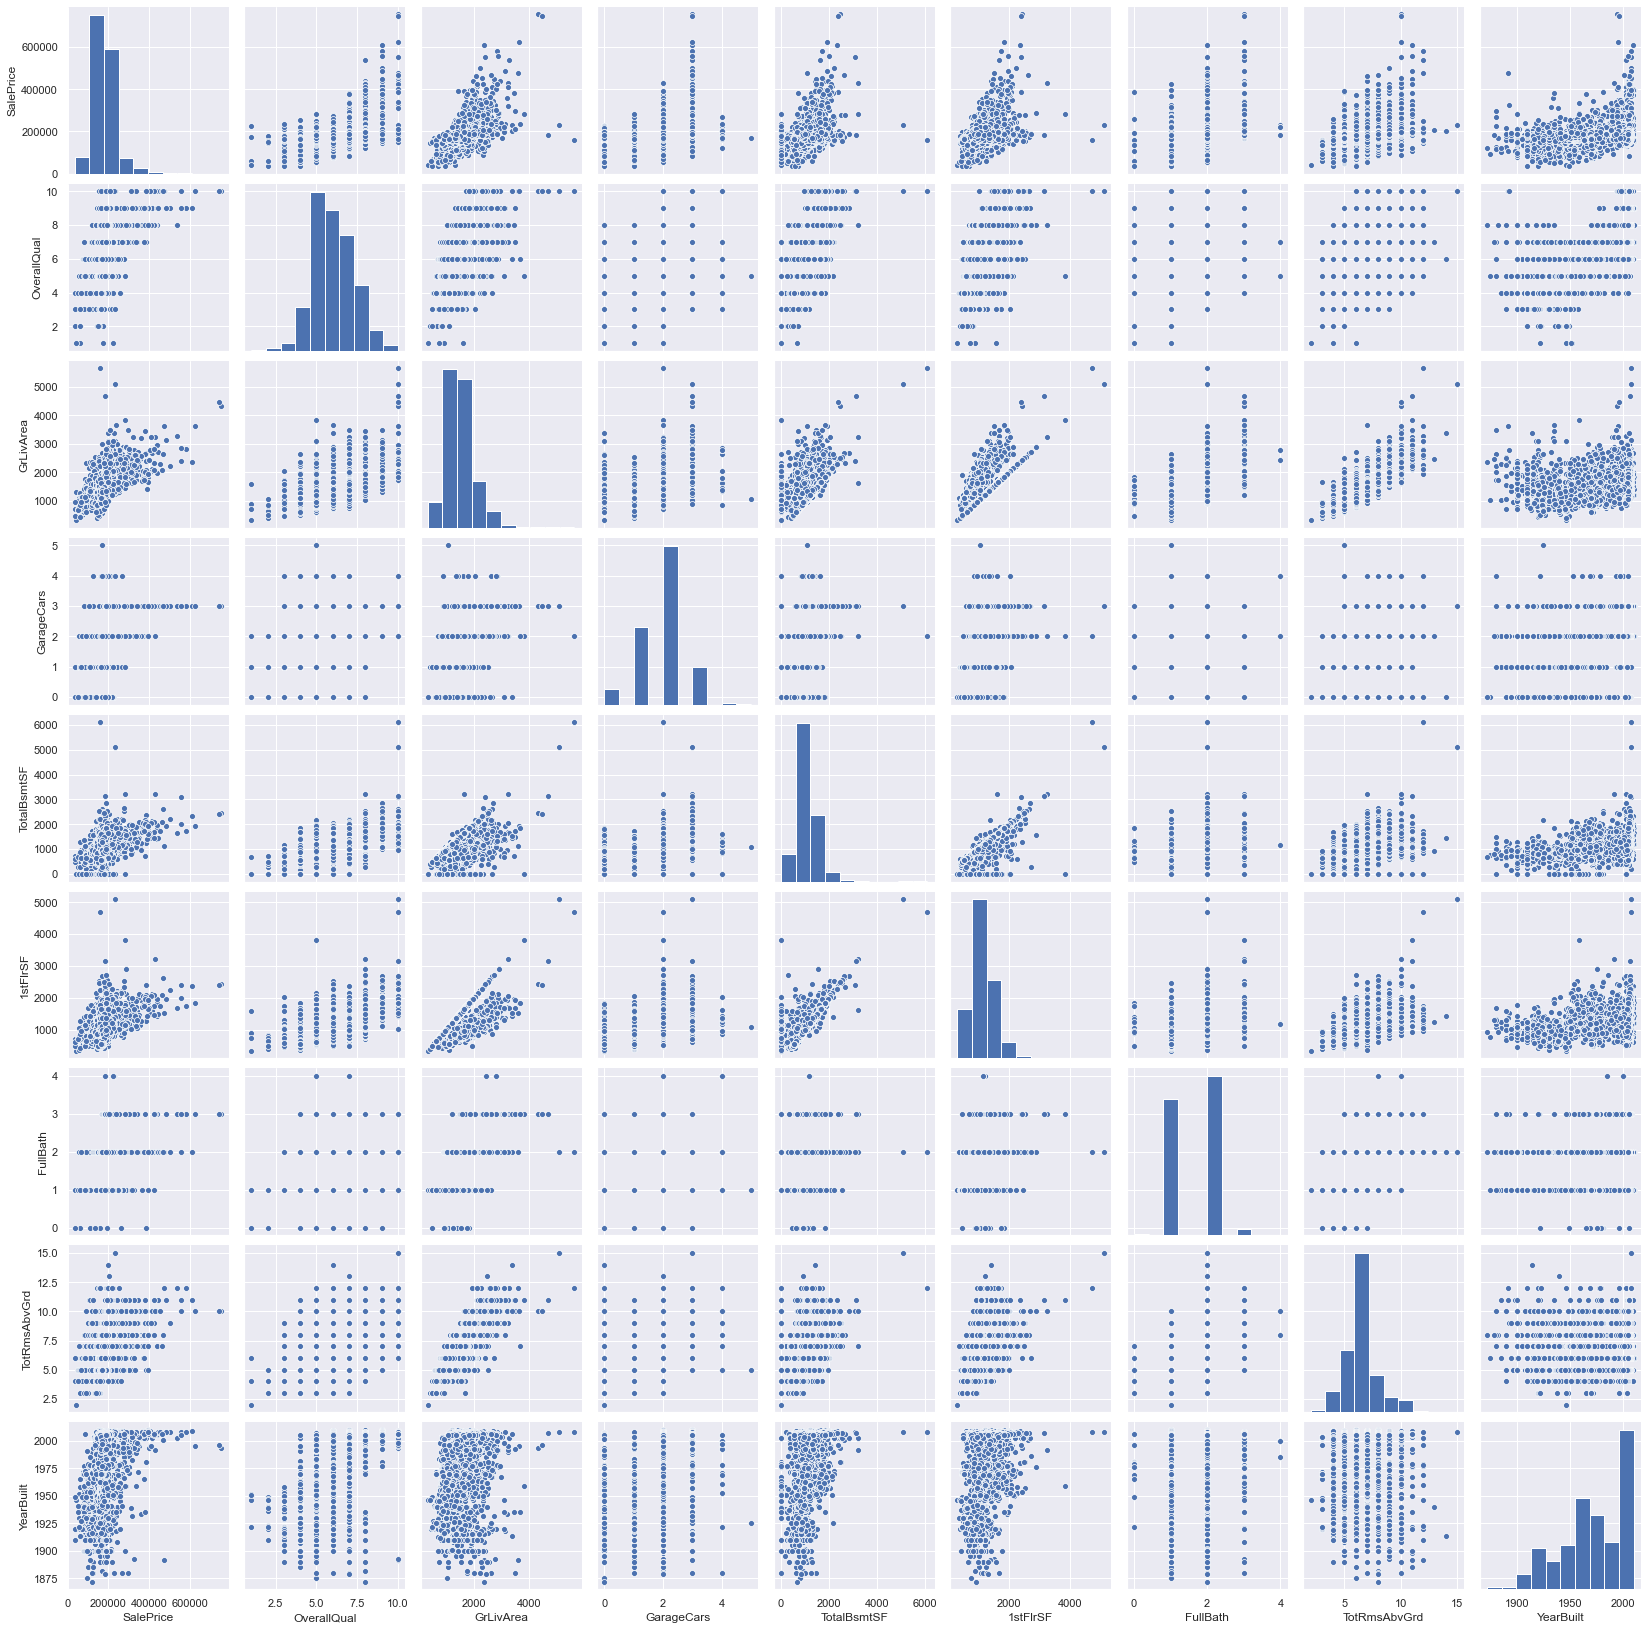

In [11]:
sns.set()
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt']
sns.pairplot(training_df[cols], height = 2.5);

In [96]:
total = training_df.isnull().sum().sort_values(ascending=False)
percent= (training_df.isnull().sum()/training_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis = 1, keys=['Total','Percent'])
missing_data[missing_data['Total']>0]

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471


In [97]:
training_df = training_df.drop((missing_data[missing_data['Total']>4]).index,1)
training_df = training_df.drop(training_df.loc[training_df['Electrical'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['MSZoning'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['BsmtFullBath'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['BsmtHalfBath'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['GarageArea'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['BsmtFinSF2'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['Exterior1st'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['TotalBsmtSF'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['GarageCars'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['BsmtUnfSF'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['BsmtFinSF1'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['KitchenQual'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['SaleType'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['Exterior2nd'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['Utilities'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['Functional'].isnull()].index)
training_df.isnull().sum().max()

0

In [98]:
from sklearn.preprocessing import StandardScaler

In [15]:
saleprice_scaled = StandardScaler().fit_transform(training_df['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print(low_range)
print(high_range)

[[-2.5262019 ]
 [-2.5190447 ]
 [-2.47395957]
 [-2.44957982]
 [-2.43738994]
 [-2.22842061]
 [-2.21971356]
 [-2.17617828]
 [-2.17617828]
 [-2.15888607]]
[[ 5.31188919]
 [ 5.60509056]
 [ 6.23483704]
 [ 6.53087691]
 [ 6.55840862]
 [ 7.01730526]
 [ 7.51750817]
 [ 7.74986464]
 [ 9.83955789]
 [10.01369899]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


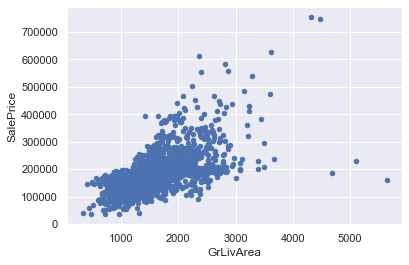

In [16]:
x_var = 'GrLivArea'
data = pd.concat([training_df['SalePrice'],training_df[x_var]], axis =1)
data.plot.scatter(x=x_var,y='SalePrice');

In [99]:
training_df.sort_values(by='GrLivArea',ascending=False)[:2]
training_df = training_df.drop(training_df[training_df['Id']==1299].index)
training_df = training_df.drop(training_df[training_df['Id']==524].index)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


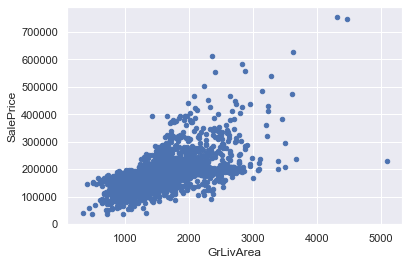

In [18]:
x_var = 'GrLivArea'
data = pd.concat([training_df['SalePrice'],training_df[x_var]], axis =1)
data.plot.scatter(x=x_var,y='SalePrice');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


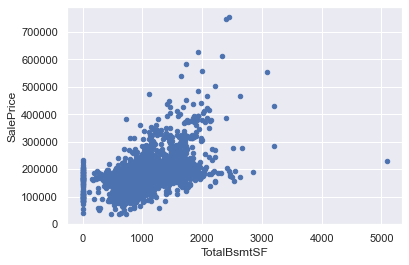

In [19]:
x_var = 'TotalBsmtSF'
data = pd.concat([training_df['SalePrice'],training_df[x_var]], axis =1)
data.plot.scatter(x=x_var,y='SalePrice');

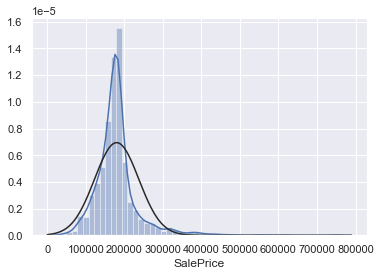

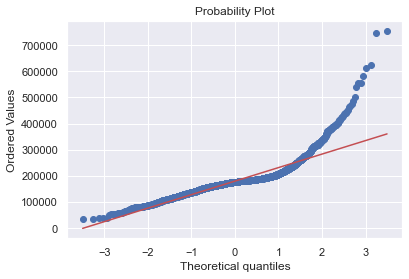

In [20]:
from scipy.stats import norm
from scipy import stats
sns.distplot(training_df.SalePrice, fit=norm);
fig = plt.figure()
res = stats.probplot(training_df.SalePrice, plot=plt)

In [21]:
#applying a log transformation
training_df.SalePrice = np.log(training_df.SalePrice)

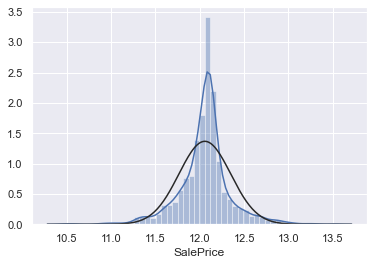

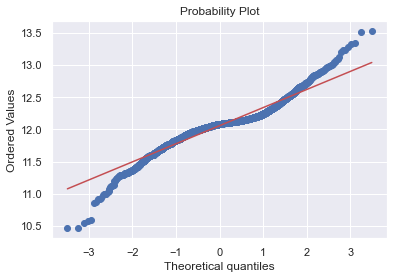

In [22]:
sns.distplot(training_df.SalePrice, fit=norm);
fig = plt.figure()
res = stats.probplot(training_df.SalePrice,plot=plt)

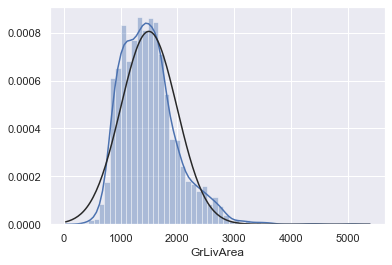

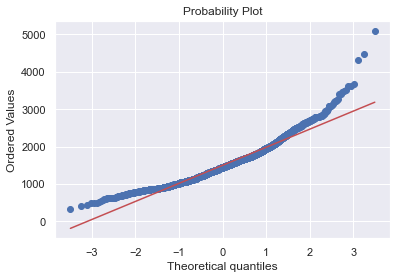

In [23]:
sns.distplot(training_df.GrLivArea,fit = norm);
fig = plt.figure()
res = stats.probplot(training_df.GrLivArea,plot=plt)

In [24]:
training_df.GrLivArea = np.log(training_df.GrLivArea)

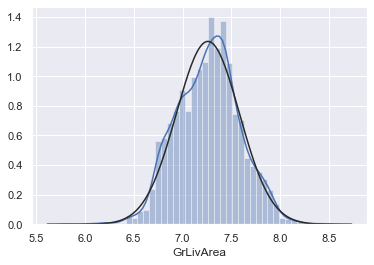

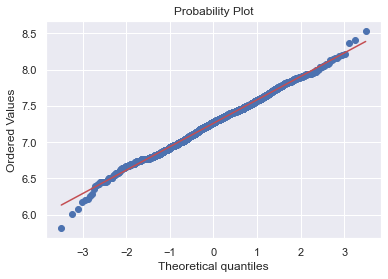

In [25]:
sns.distplot(training_df.GrLivArea, fit=norm);
fig = plt.figure()
res = stats.probplot(training_df.GrLivArea,plot=plt)

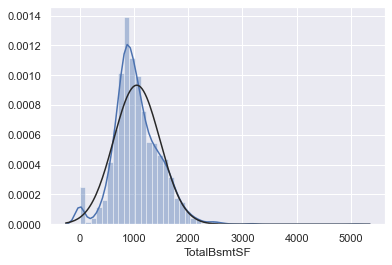

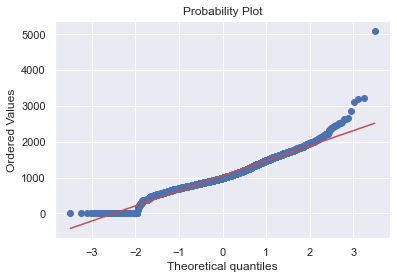

In [26]:
sns.distplot(training_df.TotalBsmtSF,fit = norm);
fig = plt.figure()
res = stats.probplot(training_df.TotalBsmtSF,plot=plt)

In [27]:
training_df['HasBsmt'] = pd.Series(len(training_df.TotalBsmtSF), index = training_df.index)
training_df.HasBsmt = 0
training_df.loc[training_df.TotalBsmtSF>0,'HasBsmt']=1

In [28]:
training_df.loc[training_df.HasBsmt==1,'TotalBsmtSF'] = np.log(training_df.TotalBsmtSF)

C:\Users\Chandni\Anaconda3\envs\PythonAdv\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


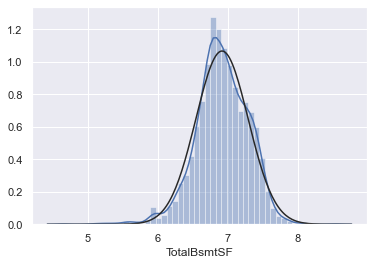

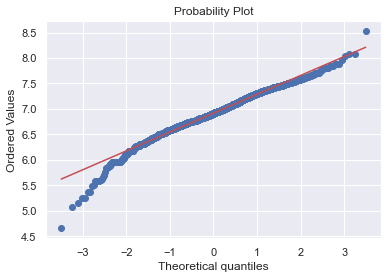

In [29]:
sns.distplot(training_df[training_df.TotalBsmtSF>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(training_df[training_df.TotalBsmtSF>0]['TotalBsmtSF'],plot=plt)

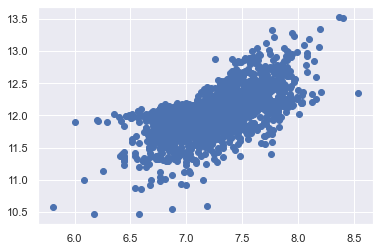

In [30]:
plt.scatter(training_df.GrLivArea,training_df.SalePrice);

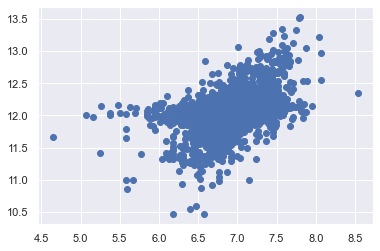

In [31]:
plt.scatter(training_df[training_df.TotalBsmtSF>0]['TotalBsmtSF'],training_df[training_df.TotalBsmtSF>0]['SalePrice']);

In [32]:
training_df = pd.get_dummies(training_df)

In [33]:
training_df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,1936,4,7,1970,1970,0.0,0.0,546.0,...,0,0,0,1,0,0,0,0,1,0
2915,2916,160,1894,4,5,1970,1970,252.0,0.0,294.0,...,0,0,0,1,1,0,0,0,0,0
2916,2917,20,20000,5,7,1960,1996,1224.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
2917,2918,85,10441,5,5,1992,1992,337.0,0.0,575.0,...,0,0,0,1,0,0,0,0,1,0


In [42]:
training_df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,1936,4,7,1970,1970,0.0,0.0,546.0,...,0,0,0,1,0,0,0,0,1,0
2915,2916,160,1894,4,5,1970,1970,252.0,0.0,294.0,...,0,0,0,1,1,0,0,0,0,0
2916,2917,20,20000,5,7,1960,1996,1224.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
2917,2918,85,10441,5,5,1992,1992,337.0,0.0,575.0,...,0,0,0,1,0,0,0,0,1,0


In [110]:
X_train = test[training_df.Id<1461]
X_train = X_train.drop(columns='SalePrice')
X_test = test[training_df.Id>1460]
X_test = X_test.drop(columns='SalePrice')
y_train = test[training_df.Id<1461]
y_train = y_train["SalePrice"]
y_test = test[training_df.Id>1460]
y_test = y_test["SalePrice"]
print(X_train.shape,y_train.shape)


(1457, 220) (1457,)


In [111]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [112]:
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 1.0
Testing Score: 0.9999999999999974


Text(0.5, 1.0, 'Residual Plot')

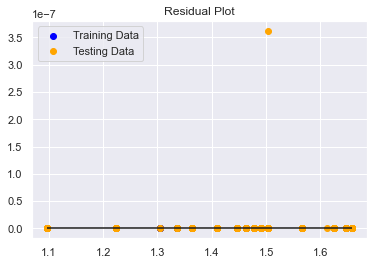

In [113]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_train.min(), xmax=y_train.max())
plt.title("Residual Plot")

# end

In [102]:
from sklearn.model_selection import train_test_split

X = test.drop(columns='SalePrice')
y = test["SalePrice"].values.reshape(-1,1)
print(X.shape,y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape,y_train.shape)

(2904, 220) (2904, 1)
(2178, 220) (2178, 1)


In [103]:
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 1.0
Testing Score: 0.9999999999999926


Text(0.5, 1.0, 'Residual Plot')

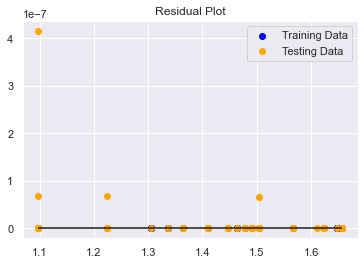

In [104]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_train.min(), xmax=y.max())
plt.title("Residual Plot")

In [94]:
X_test

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
141,2.995732,1.097189,7,5,2005,2005,1300.0,0.0,434.0,7.458186,...,0,0,0,1,0,0,0,0,1,0
820,4.094345,1.409607,7,5,2003,2003,0.0,0.0,798.0,6.682109,...,0,0,0,1,0,0,0,0,1,0
486,2.995732,1.097189,5,7,1965,1965,836.0,0.0,237.0,6.978214,...,0,0,0,1,0,0,0,0,1,0
1721,2.995732,1.097189,5,5,2004,2004,0.0,0.0,1114.0,7.015712,...,0,0,0,1,0,0,0,0,1,0
1201,4.094345,1.409607,7,5,1998,1998,0.0,0.0,866.0,6.763885,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,4.094345,1.409607,7,6,2007,2007,0.0,0.0,813.0,6.700731,...,0,0,0,1,0,0,0,0,1,0
522,3.912023,1.364055,6,7,1947,1950,399.0,0.0,605.0,6.911747,...,0,0,0,1,0,0,0,0,1,0
1380,3.401197,1.224128,3,3,1914,1950,203.0,0.0,661.0,6.761573,...,0,0,0,1,0,0,0,0,1,0
875,4.094345,1.409607,8,5,2007,2007,64.0,0.0,1120.0,7.076654,...,0,1,0,0,0,0,0,0,0,1


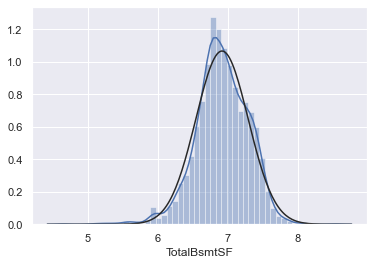

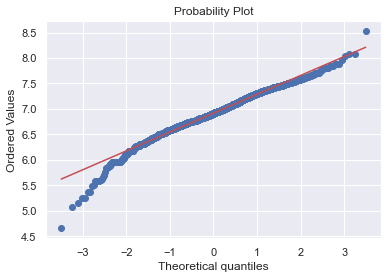

In [45]:
sns.distplot(training_df[training_df.TotalBsmtSF>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(training_df[training_df.TotalBsmtSF>0]['TotalBsmtSF'],plot=plt)

In [84]:
test = training_df
test = test.drop(columns=['Id'])
# .columns.to_list()

In [53]:
test.columns.to_list()[0]

'MSSubClass'

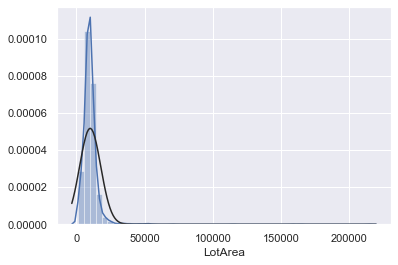

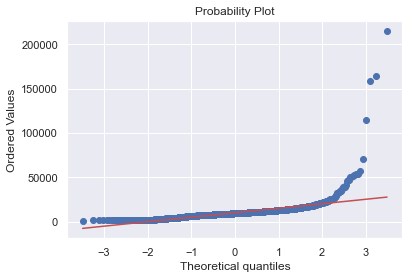

In [56]:
var = test.columns.to_list()[1]
sns.distplot(training_df[training_df[var]>0][var], fit=norm);
fig = plt.figure()
res = stats.probplot(training_df[training_df.TotalBsmtSF>0][var],plot=plt)

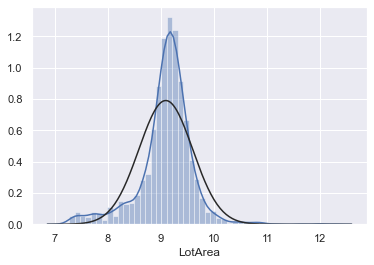

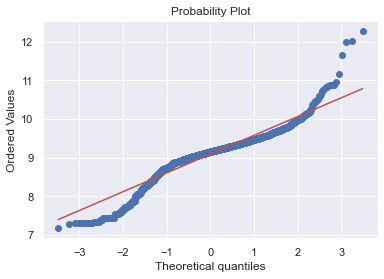

In [57]:
training_df[var] = np.log(training_df[var])
sns.distplot(training_df[training_df[var]>0][var], fit=norm);
fig = plt.figure()
res = stats.probplot(training_df[training_df[var]>0][var],plot=plt)

In [100]:
for var in test.columns:
    
    if test[var].kurtosis() > 1.96 or test[var].kurtosis() < -1.96 or test[var].skew() > 1 or test[var].skew() < -1:
        if test[var].min() != 0 and test[var].max() !=1:
            test[var] = np.log(test[test[var]>0])


In [86]:
test

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.094345,1.409607,7,5,2003,2003,706.0,0.0,150.0,6.752270,...,0,0,0,1,0,0,0,0,1,0
1,2.995732,1.097189,6,8,1976,1976,978.0,0.0,284.0,7.140453,...,0,0,0,1,0,0,0,0,1,0
2,4.094345,1.409607,7,5,2001,2002,486.0,0.0,434.0,6.824374,...,0,0,0,1,0,0,0,0,1,0
3,4.248495,1.446565,7,5,1915,1970,216.0,0.0,540.0,6.628041,...,0,0,0,1,1,0,0,0,0,0
4,4.094345,1.409607,8,5,2000,2000,655.0,0.0,490.0,7.043160,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,5.075174,1.624361,4,7,1970,1970,0.0,0.0,546.0,6.302619,...,0,0,0,1,0,0,0,0,1,0
2915,5.075174,1.624361,4,5,1970,1970,252.0,0.0,294.0,6.302619,...,0,0,0,1,1,0,0,0,0,0
2916,2.995732,1.097189,5,7,1960,1996,1224.0,0.0,0.0,7.109879,...,0,0,0,1,1,0,0,0,0,0
2917,4.442651,1.491251,5,5,1992,1992,337.0,0.0,575.0,6.815640,...,0,0,0,1,0,0,0,0,1,0


0

In [89]:
test.drop(columns='SalePrice')

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.094345,1.409607,7,5,2003,2003,706.0,0.0,150.0,6.752270,...,0,0,0,1,0,0,0,0,1,0
1,2.995732,1.097189,6,8,1976,1976,978.0,0.0,284.0,7.140453,...,0,0,0,1,0,0,0,0,1,0
2,4.094345,1.409607,7,5,2001,2002,486.0,0.0,434.0,6.824374,...,0,0,0,1,0,0,0,0,1,0
3,4.248495,1.446565,7,5,1915,1970,216.0,0.0,540.0,6.628041,...,0,0,0,1,1,0,0,0,0,0
4,4.094345,1.409607,8,5,2000,2000,655.0,0.0,490.0,7.043160,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,5.075174,1.624361,4,7,1970,1970,0.0,0.0,546.0,6.302619,...,0,0,0,1,0,0,0,0,1,0
2915,5.075174,1.624361,4,5,1970,1970,252.0,0.0,294.0,6.302619,...,0,0,0,1,1,0,0,0,0,0
2916,2.995732,1.097189,5,7,1960,1996,1224.0,0.0,0.0,7.109879,...,0,0,0,1,1,0,0,0,0,0
2917,4.442651,1.491251,5,5,1992,1992,337.0,0.0,575.0,6.815640,...,0,0,0,1,0,0,0,0,1,0
